In [99]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
threshold = 0.35
label = True # Fasle for correlation without label
binary_classify = True # False for multi-classify
data_path = "../data/data_age.xlsx"

In [101]:
data = pd.read_excel(data_path)
data_old = data[data['Age']>=60]
data_young = data[data['Age']<60]

In [102]:
data_old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 3 to 100
Columns: 103 entries, No. to Binary-label
dtypes: float64(77), int64(23), object(3)
memory usage: 37.4+ KB


In [103]:
data_young.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 99
Columns: 103 entries, No. to Binary-label
dtypes: float64(77), int64(23), object(3)
memory usage: 44.7+ KB


In [104]:
def preprocess_data(data, binary_classify):
    data = data.drop(columns=['No.', 'Full Name', 'Sample ID', 'Birth year', 'Gender', 'Age'])
    if not binary_classify:
        data = data.drop(columns=['Binary-label'])
    data = data.drop(columns=['Multi-label'])
    return data

In [105]:
data_old = preprocess_data(data_old, binary_classify)
data_young = preprocess_data(data_young, binary_classify)

In [106]:
def feature_selection(data, label):
    # select all columns of numeric types (including the label column if applicable)
    num_col = list(data.select_dtypes(include='number').columns)

    if label:
        # compute pairwise correlation of columns
        corr_matrix = data[num_col].corr()

        # corr. value between X and Y, where X = 'label' and Y is an arbitrary column
        corr_xy_given_x_is_label = corr_matrix['Binary-label']

        most_corr_values = corr_xy_given_x_is_label[abs(corr_xy_given_x_is_label) > threshold]

        multi_cols = most_corr_values.index
    else:
        num_col.remove('Binary-label')

        corr_matrix = (data[num_col].corr())

        corr_features_mean = corr_matrix.mean(axis=0)

        most_corr_values = corr_features_mean[(corr_features_mean) > threshold]

        multi_cols = most_corr_values.index

        multi_cols = pd.Index(list(multi_cols) + ['Binary-label'])
    return multi_cols


In [107]:
multi_cols_old = feature_selection(data_old, label)
multi_cols_young = feature_selection(data_young, label)

In [108]:
len(multi_cols_old)

12

In [109]:
len(multi_cols_young)

26

In [110]:
multi_cols_old

Index(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4', 'D1_Abs CD8', 'D2_Lympho',
       'D2_Mono', 'D3_Lympho', 'D3_Class-switched', 'D4_Lympho', 'D4_Treg',
       'D6_Lympho', 'Binary-label'],
      dtype='object')

In [111]:
multi_cols_young

Index(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4', 'D1_Abs CD8',
       'D1_Abs CD19', 'D2_Lympho', 'D2_Mono', 'D2_Mono, CD14+ HLA_DR+',
       'D3_Lympho', 'D3_Plasmacells', 'D3_Class-switched', 'D3_Q1_ naive',
       'D3_Q1_ memory', 'D3_Q1_ CD21 low', 'D4_Lympho', 'D4_T cells',
       'D5_T cell', 'D5_NK, CD69+', 'D5_T, CD57+', 'D5_T, CD25+',
       'D5_T, CD69+', 'D6_Lympho', 'D6_T cells', 'D6_DNAM-1 FITC-A Median',
       'D6_NKp44 PE-A Median', 'Binary-label'],
      dtype='object')

In [112]:
data_old_selected = data_old[multi_cols_old]
data_young_selected = data_young[multi_cols_young]

In [113]:
data_old_selected_melt = pd.melt(data_old_selected, id_vars="Binary-label",
               var_name="features",
               value_name="value")
data_young_selected_melt = pd.melt(data_young_selected, id_vars="Binary-label",
               var_name="features",
               value_name="value")

C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

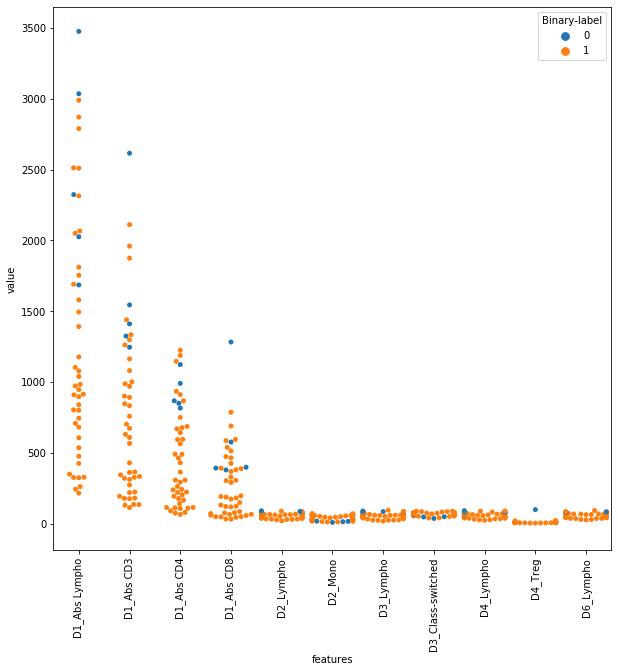

In [114]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue='Binary-label' ,data=data_old_selected_melt)

plt.xticks(rotation=90)

C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\thien\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.7% of the points

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

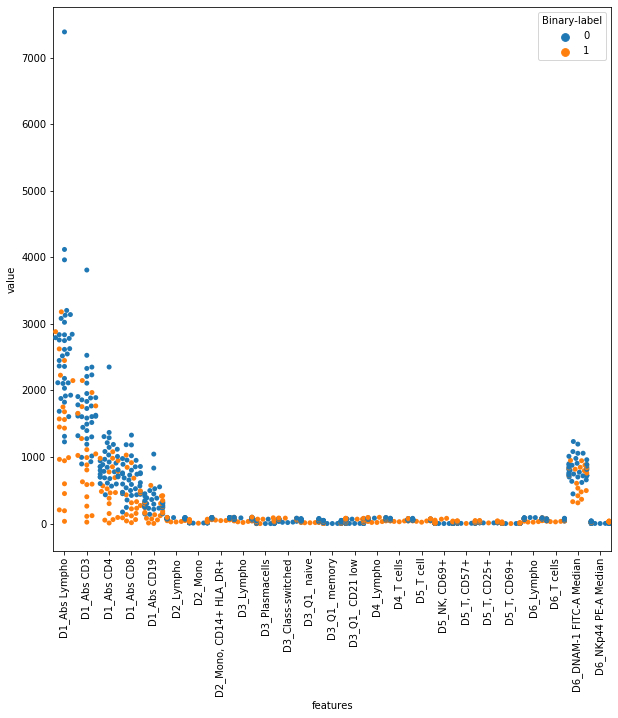

In [115]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue='Binary-label' ,data=data_young_selected_melt)

plt.xticks(rotation=90)

In [116]:
multi_cols_old_small = multi_cols_old.drop(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4', 'D1_Abs CD8'])
multi_cols_old_small

Index(['D2_Lympho', 'D2_Mono', 'D3_Lympho', 'D3_Class-switched', 'D4_Lympho',
       'D4_Treg', 'D6_Lympho', 'Binary-label'],
      dtype='object')

In [117]:
data_old_selected_small = data_old[multi_cols_old_small]

In [118]:
data_old_selected_small_melt = pd.melt(data_old_selected_small, id_vars="Binary-label",
               var_name="features",
               value_name="value")

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

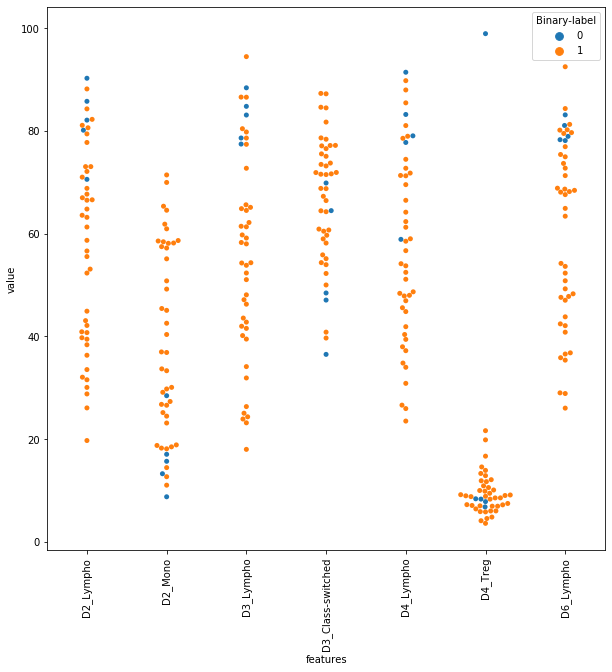

In [119]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue='Binary-label' ,data=data_old_selected_small_melt)

plt.xticks(rotation=90)

In [99]:
multi_cols_female_small = multi_cols_female.drop(['D1_Abs Lympho', 'D1_Abs CD3', 'D1_Abs CD4'])
multi_cols_female_small

Index(['D2_Lympho', 'D2_Mono', 'D2_Mono, CD14+ HLA_DR+', 'D2_B cells',
       'D3_Lympho', 'D3_Q1_ naive', 'D3_Q1_ CD21 low', 'D4_Lympho',
       'D5_NK, CD69+', 'Binary-label'],
      dtype='object')

In [100]:
data_female_selected_small = data_female[multi_cols_female_small]
data_female_selected_small_melt = pd.melt(data_female_selected_small, id_vars="Binary-label",
               var_name="features",
               value_name="value")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

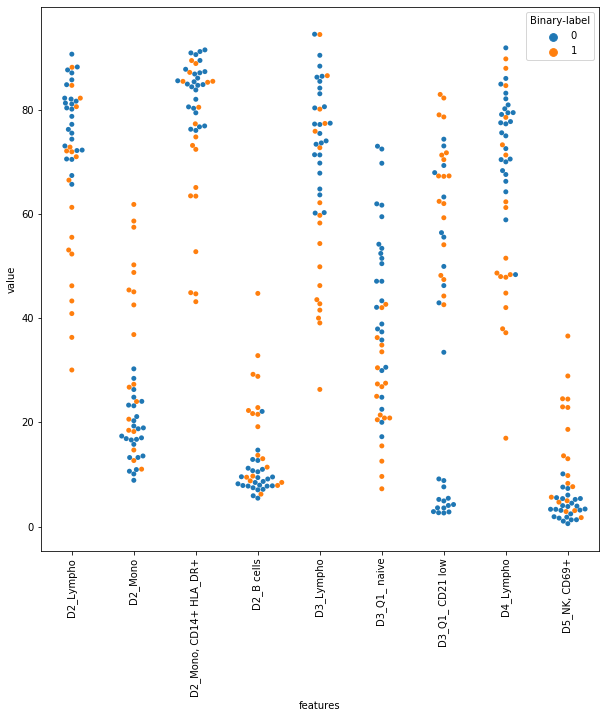

In [101]:
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue='Binary-label' ,data=data_female_selected_small_melt)

plt.xticks(rotation=90)